# <center>DeepLearning Final Project - GROUP MODEL</center>
  <center>(with DataAugmentation)</center>

### GROUP 5
Group members:<br>
Juan Arevalo<br>
Jose Muniz<br>
Ruben Ormeno<br>
Samantha Ortiz de Foronda<br>
Mariela Ramos<br>


In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

C:\Users\maric\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Define path to your dataset
data_dir = r"C:\MR\Centennial\Sem4\Deep Learning\project\brain_tumor_dataset"


In [3]:
# Function to display sample images
def display_sample_images(image_paths, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = random.randint(0, len(image_paths) - 1)
        img_path = image_paths[idx]
        label = labels[idx]
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(label)
        axes[i].axis('off')
    plt.show()
    

In [4]:
# Get list of all image paths and corresponding labels
image_paths = []
labels = []

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    for img_name in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_name)
        image_paths.append(img_path)
        labels.append(label)

# Print total number of images
print("Total number of images:", len(image_paths))

# Print number of unique labels and the labels
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
print("Labels:", unique_labels)

# Print the quantity of each label
print("Quantity of each label:")
label_counts = {label: labels.count(label) for label in unique_labels}
for label, count in label_counts.items():
    print(f"{label}: {count}")

Total number of images: 253
Number of unique labels: 2
Labels: {'no', 'yes'}
Quantity of each label:
no: 98
yes: 155


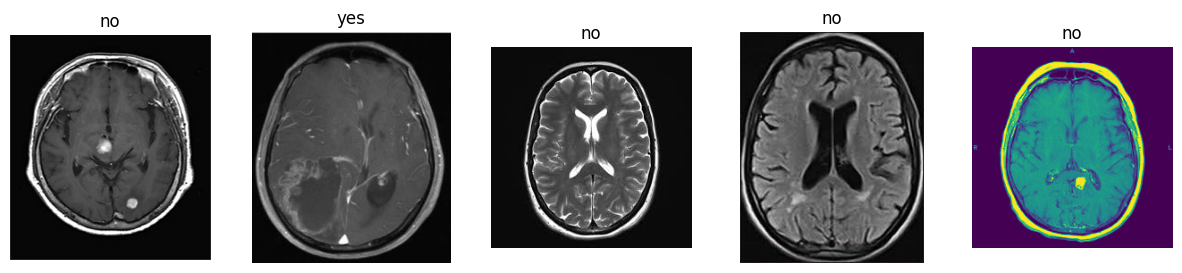

In [5]:
# Display sample images
display_sample_images(image_paths, labels)

Total number of images: 253
Number of unique labels: 2
Labels: {0, 1}
Quantity of each label:
0: 98
1: 155


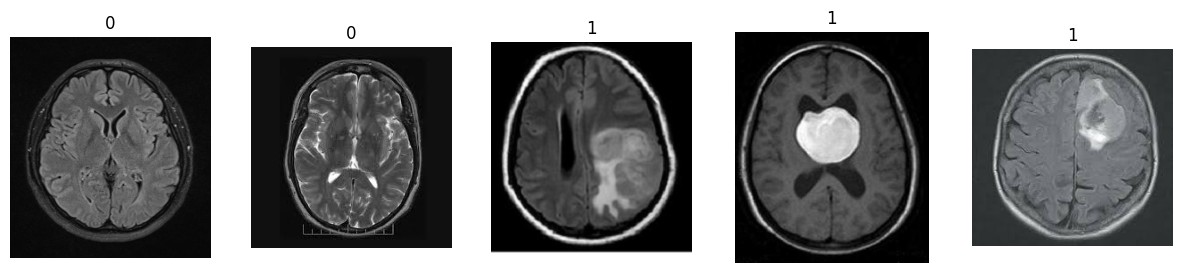

In [6]:
# Convert labels from YES and NO to 0 and 1
labels = [1 if label == "yes" else 0 for label in labels]

# Print total number of images
print("Total number of images:", len(image_paths))

# Print number of unique labels and the labels
unique_labels = set(labels)
print("Number of unique labels:", len(unique_labels))
print("Labels:", unique_labels)

# Print the quantity of each label
print("Quantity of each label:")
label_counts = {label: labels.count(label) for label in unique_labels}
for label, count in label_counts.items():
    print(f"{label}: {count}")  # Display sample images
display_sample_images(image_paths, labels)


In [7]:
# Function to preprocess images and create a TensorFlow dataset
def preprocess_images(image_paths, labels, target_size=(224, 224), color_mode='rgb'):
    images = []
    for img_path in image_paths:
        # Load and preprocess each image
        img = tf.io.read_file(img_path)
        img = tf.image.decode_image(img, channels=3)  # Ensure RGB images
        img = tf.image.resize(img, target_size)
        if color_mode == 'grayscale':
            img = tf.image.rgb_to_grayscale(img)
        img = tf.cast(img, tf.float32) / 255.0  # Normalize to [0, 1]
        images.append(img)
    dataset_images = tf.stack(images)  # Convert list of tensors to a single tensor
    dataset_labels = tf.convert_to_tensor(labels)  # Convert list of labels to tensor
    return dataset_images, dataset_labels

In [8]:
# Create TensorFlow dataset from image paths and labels
dataset_images, dataset_labels = preprocess_images(image_paths, labels)

In [9]:
# Print shape of images after preprocessing
print("Shape of preprocessed images:", dataset_images.shape)
print("Shape of preprocessed labels:", dataset_labels.shape)

Shape of preprocessed images: (253, 224, 224, 3)
Shape of preprocessed labels: (253,)


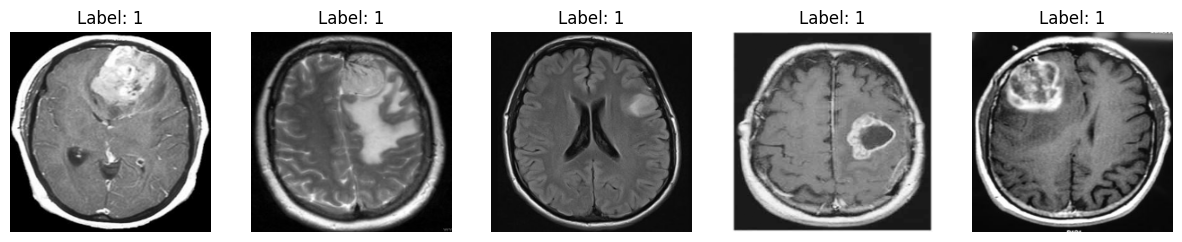

In [10]:
# Select 5 random indices
random_indices = random.sample(range(len(dataset_images)), 5)

# Plot the selected images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(random_indices):
    img = dataset_images[idx]
    label = dataset_labels[idx]
    axes[i].imshow(img.numpy())
    axes[i].set_title(f"Label: {label.numpy()}")
    axes[i].axis('off')
plt.show()

In [11]:
# Split the dataset into training, validation, and testing sets and shuffle 
dataset_images_array = dataset_images.numpy()
dataset_labels_array = dataset_labels.numpy()

train_images, test_images, train_labels, test_labels = train_test_split(
    dataset_images_array, dataset_labels_array, test_size=0.2, random_state=42, shuffle=True)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.20, random_state=42, shuffle=True)

# Print the number of training and testing samples
print("Number of training samples:", len(train_images))
print("Number of validation samples:", len(val_images))
print("Number of testing samples:", len(test_images))

Number of training samples: 161
Number of validation samples: 41
Number of testing samples: 51


In [12]:
# Get the unique labels and their counts in each dataset
unique_train_labels, train_label_counts = np.unique(train_labels, return_counts=True)
unique_val_labels, val_label_counts = np.unique(val_labels, return_counts=True)
unique_test_labels, test_label_counts = np.unique(test_labels, return_counts=True)

# Print the number of instances of each unique label in each dataset
print("Number of instances of each unique label in the training set:")
for label, count in zip(unique_train_labels, train_label_counts):
    print(f"Label {label}: {count} instances")

print("\nNumber of instances of each unique label in the validation set:")
for label, count in zip(unique_val_labels, val_label_counts):
    print(f"Label {label}: {count} instances")

print("\nNumber of instances of each unique label in the testing set:")
for label, count in zip(unique_test_labels, test_label_counts):
    print(f"Label {label}: {count} instances")


Number of instances of each unique label in the training set:
Label 0: 67 instances
Label 1: 94 instances

Number of instances of each unique label in the validation set:
Label 0: 11 instances
Label 1: 30 instances

Number of instances of each unique label in the testing set:
Label 0: 20 instances
Label 1: 31 instances


In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

### Data augmentation

In [14]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.10),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.05),
    layers.RandomZoom(height_factor=0.05, width_factor=0.05),
]

In [15]:
def img_augmentation(images, labels):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images, labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


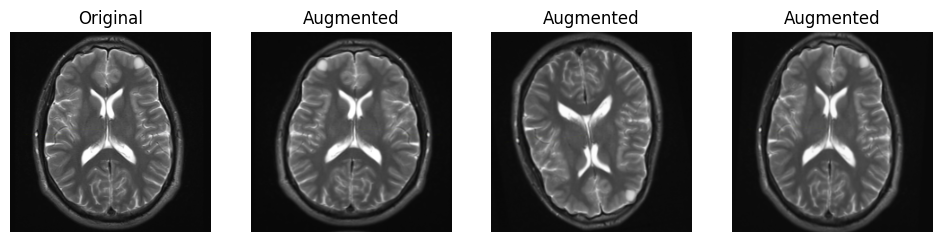

In [16]:
plt.figure(figsize=(15, 3))

# Select the first image and its label from the dataset
image = train_images[0]
label = train_labels[0]

# Display the original image
ax = plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title("Original")  # Title indicating it's the original image
plt.axis("off")


# Apply data augmentation and display augmented images
for i in range(3):
    ax = plt.subplot(1, 5, i + 2)
    # Perform data augmentation on the image (e.g., rotation, flipping, etc.)
    augmented_image, augmented_label = img_augmentation(np.expand_dims(image, axis=0), label)  # Pass both image and label

    plt.imshow(augmented_image[0])
    plt.title("Augmented")
    plt.axis("off")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


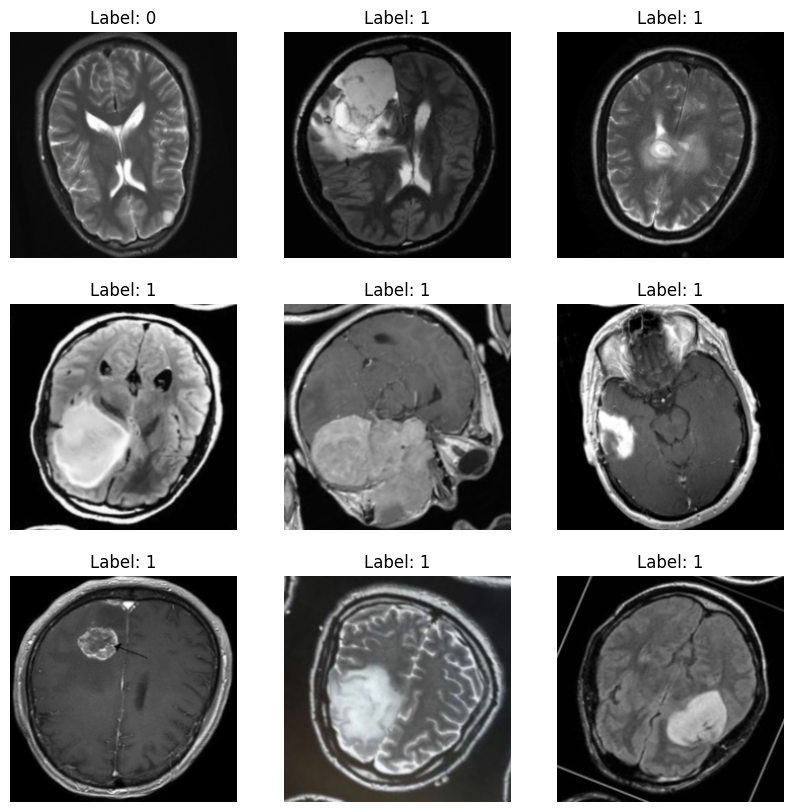

In [17]:
# Apply data augmentation to the entire training dataset
train_augmented_dataset = train_dataset.map(lambda x, y: img_augmentation(x, y))

# Combine original and augmented datasets
train_combined_dataset = train_dataset.concatenate(train_augmented_dataset)

# Shuffle the combined dataset
train_dataset = train_combined_dataset.shuffle(buffer_size=len(train_images) * 2)  # Multiply by 2 for augmented data


plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_augmented_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis("off")
plt.show()

In [18]:
# Get the number of elements in training dataset
dataset_size = tf.data.experimental.cardinality(train_dataset).numpy()

print("Quantity of images in train after augmentation:", dataset_size)

Quantity of images in train after augmentation: 322


### Group Model

In [19]:
batch_size = 32
num_epochs = 10
height, width = 224, 224
channels = 3

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\maric\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model using the augmented dataset
history = model.fit(train_dataset.batch(batch_size), epochs=num_epochs, validation_data=val_dataset.batch(batch_size))

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5090 - loss: 1.8245 - val_accuracy: 0.7317 - val_loss: 0.6488
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 955ms/step - accuracy: 0.6125 - loss: 0.6061 - val_accuracy: 0.6341 - val_loss: 0.7270
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7534 - loss: 0.5526 - val_accuracy: 0.5610 - val_loss: 0.6538
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6835 - loss: 0.6030 - val_accuracy: 0.7073 - val_loss: 0.6098
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7535 - loss: 0.5749 - val_accuracy: 0.7317 - val_loss: 0.5534
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8142 - loss: 0.4444 - val_accuracy: 0.5610 - val_loss: 0.7220
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 775ms/step - accuracy: 0.7761 - loss: 0.4797 - val_accuracy: 0.7317 - val_loss: 0.5362
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7885 - loss: 0.4623 - val_accuracy: 0.7805 - val

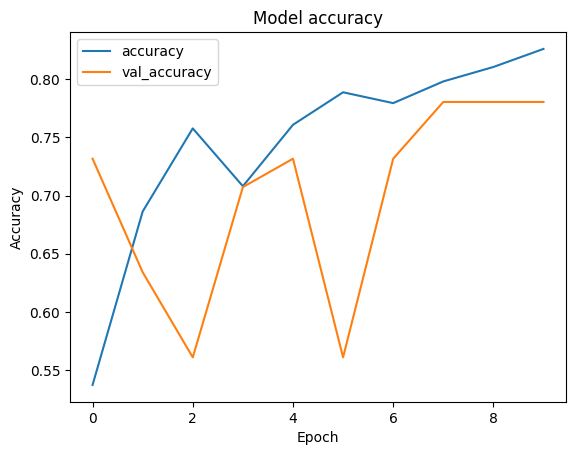

In [21]:
def plot_hist(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title("Model accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_hist(history)

In [22]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset.batch(batch_size))

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.8564 - loss: 0.3420
Test Loss: 0.31390389800071716
Test Accuracy: 0.8627451062202454


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 807ms/step
[[15  5]
 [ 2 29]]


Text(0.5, 1.0, 'Confusion Matrix')

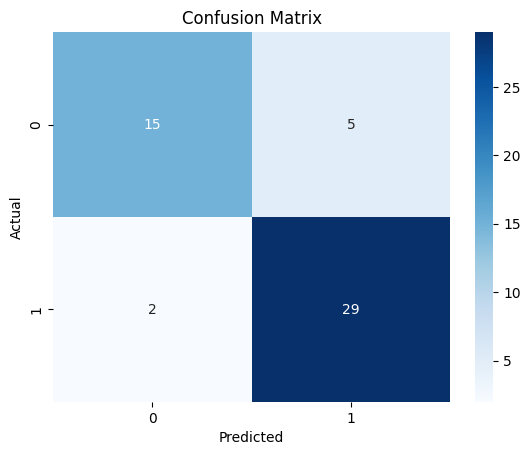

In [23]:
#predicting the test set
probabilities = model.predict(test_dataset.batch(batch_size))

predicted_labels = (probabilities > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_labels)
print(cm)

#plotting the confusion matrix
import seaborn as sns
# Create the heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

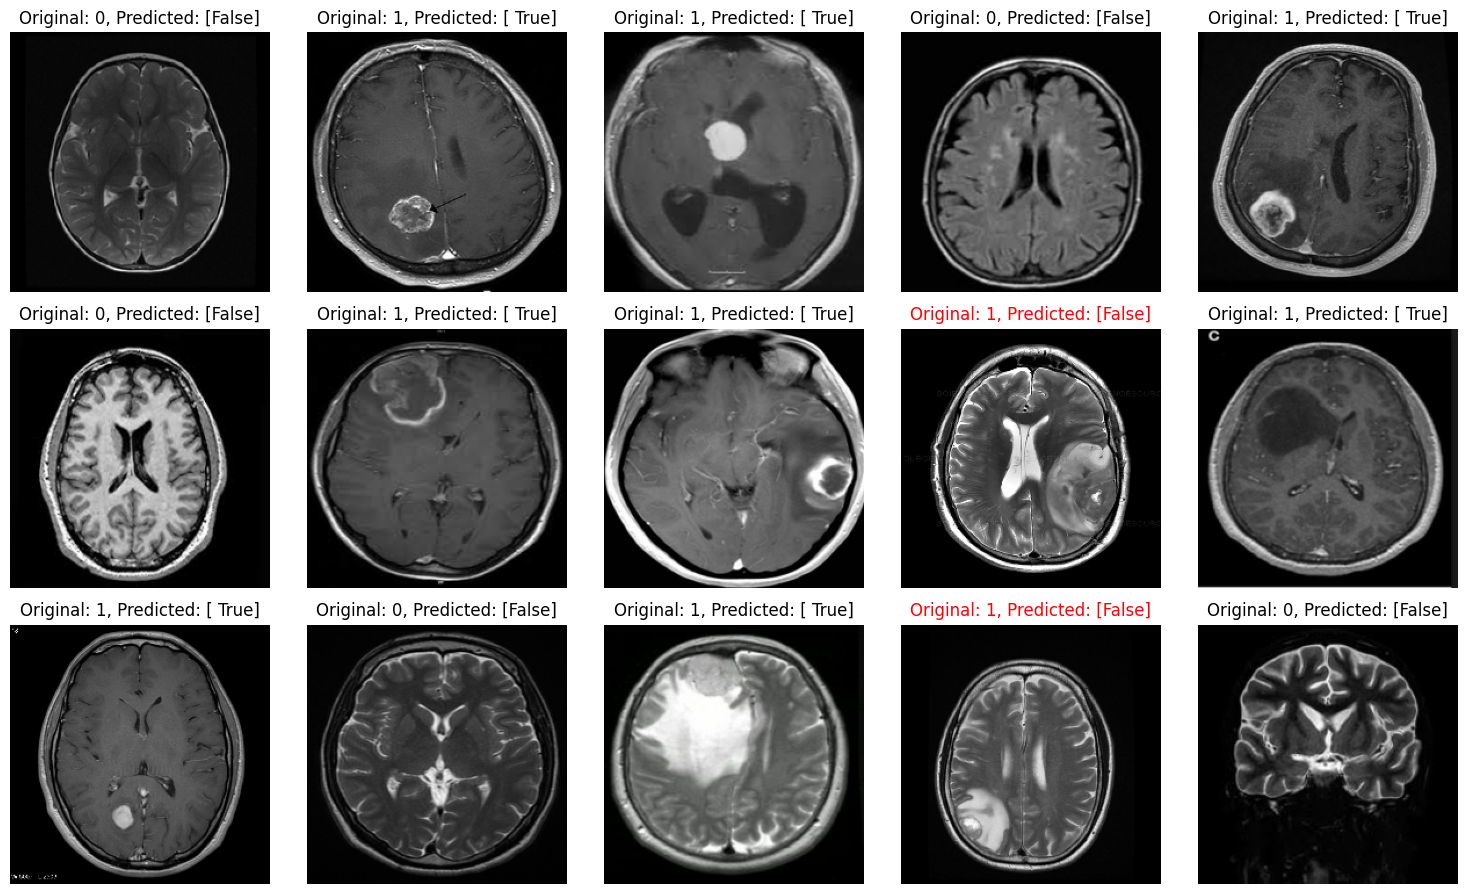

In [24]:
# Choose random indices for selecting images
num_images = 15
random_indices = random.sample(range(len(test_images)), num_images)

# Create a grid for plotting
num_rows = (num_images // 5) + 1  
plt.figure(figsize=(15, 3 * num_rows))

# Plot each image with its original and predicted label
for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, 5, i + 1)
    plt.imshow(test_images[idx])  # Plot the original image
    plt.title("Random Images clasification of Group Model")
    plt.axis('off')
    if test_labels[idx] != predicted_labels[idx]:
        title_color = 'red'
    else:
        title_color = 'black'
    plt.title(f'Original: {test_labels[idx]}, Predicted: {predicted_labels[idx]}', color=title_color)

plt.tight_layout()
plt.show()
